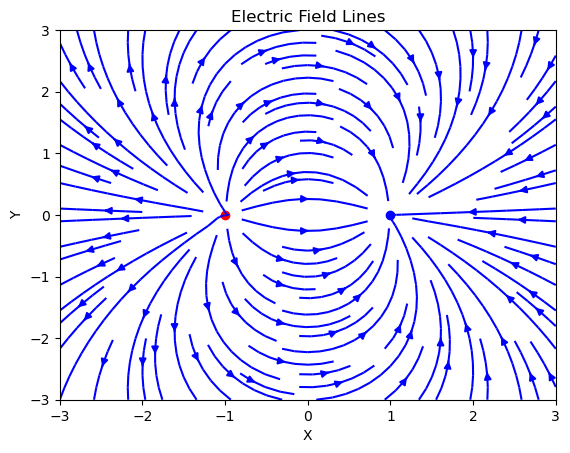

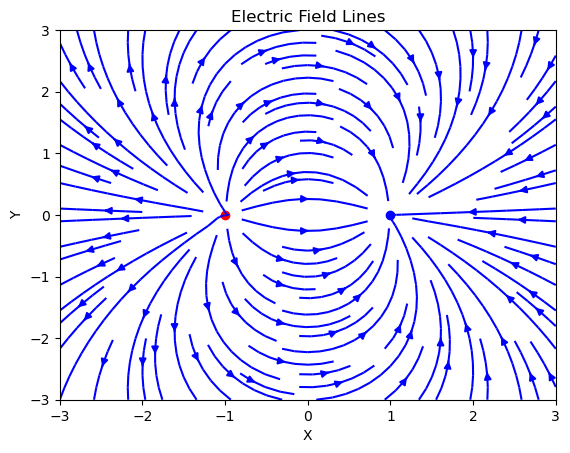

In [2]:
import numpy as np
import matplotlib.pyplot as plt

class PointCharge:
    def __init__(self, q, pos):
        self.q = q  # 电荷量
        self.pos = pos  # 位置

    def electric_field(self, x, y):
        k = 8.9875517923e9  # 真空中的电场常数
        dx = x - self.pos[0]
        dy = y - self.pos[1]
        r = np.sqrt(dx**2 + dy**2)
        E = k * self.q / r**2
        Ex = E * dx / r
        Ey = E * dy / r
        return Ex, Ey

def plot_field_lines(charges, xlim, ylim, num_points=50):
    x = np.linspace(xlim[0], xlim[1], num_points)
    y = np.linspace(ylim[0], ylim[1], num_points)
    X, Y = np.meshgrid(x, y)
    Ex_total = np.zeros_like(X)
    Ey_total = np.zeros_like(Y)
    for charge in charges:
        Ex, Ey = charge.electric_field(X, Y)
        Ex_total += Ex
        Ey_total += Ey
    plt.streamplot(X, Y, Ex_total, Ey_total, color='b')
    for charge in charges:
        plt.scatter(charge.pos[0], charge.pos[1], color='r' if charge.q > 0 else 'b', marker='o')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Electric Field Lines')
    plt.show()

# 创建正电荷和负电荷对象
positive_charge = PointCharge(q=1.0e-6, pos=[-1, 0])
negative_charge = PointCharge(q=-1.0e-6, pos=[1, 0])

# 绘制它们的电场线
plot_field_lines([positive_charge, negative_charge], xlim=(-3, 3), ylim=(-3, 3))

# 创建电偶极子对象并绘制电场线
dipole_charges = [positive_charge, negative_charge]
plot_field_lines(dipole_charges, xlim=(-3, 3), ylim=(-3, 3))


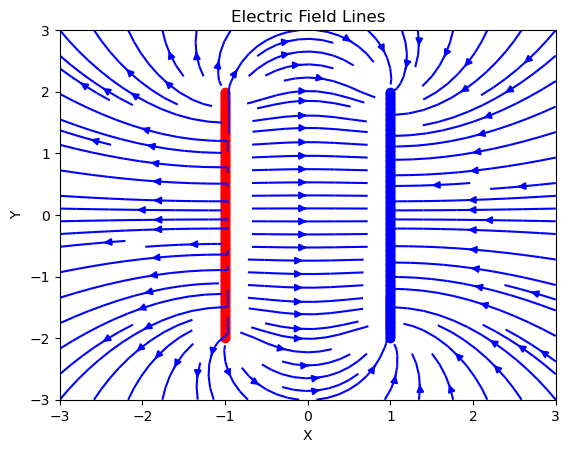

In [2]:
# 创建多个正电荷和负电荷对象，分别代表平行板上的正极和负极
num_charges = 200  # 平行板上的电荷数量
positive_charges = [PointCharge(q=1.0e-6, pos=[-1, y]) for y in np.linspace(-2, 2, num_charges)]
negative_charges = [PointCharge(q=-1.0e-6, pos=[1, y]) for y in np.linspace(-2, 2, num_charges)]

# 绘制电场线
plot_field_lines(positive_charges + negative_charges, xlim=(-3, 3), ylim=(-3, 3))
